In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set()

In [2]:
epison = np.random.normal(loc=0, scale=0.5, size=(1000))
x = np.random.uniform(low=-1.5, high=1, size=(1000))
y = 3 * (x**3) + 2 * (x**2) - 3 * x + 1 + epison

x = np.reshape(x, (1000, 1))


In [3]:
poly = {1: PolynomialFeatures(1), 2: PolynomialFeatures(2), 3: PolynomialFeatures(3), 4: PolynomialFeatures(4)}
xdata = {1: [], 2: [], 3: [], 4: []}
line = np.linspace(-1.5, 1, 250)
line = np.reshape(line, (250, 1))
xline = {1: [], 2: [], 3: [], 4: []}

for key in poly.keys():
    xdata[key] = poly[key].fit_transform(x)
    xline[key] = poly[key].fit_transform(line)
# for key in data.keys():
#     print(data[key][0], x[0])
    #print(type(data[key]))

In [4]:
model = {1: LinearRegression(fit_intercept = False), 2: LinearRegression(fit_intercept = False), 3: LinearRegression(fit_intercept = False), 4: LinearRegression(fit_intercept = False)}
yline = {1: [], 2: [], 3: [], 4: []}
for key in model.keys():
    model[key].fit(xdata[key], y)
    yline[key] = model[key].predict(xline[key])





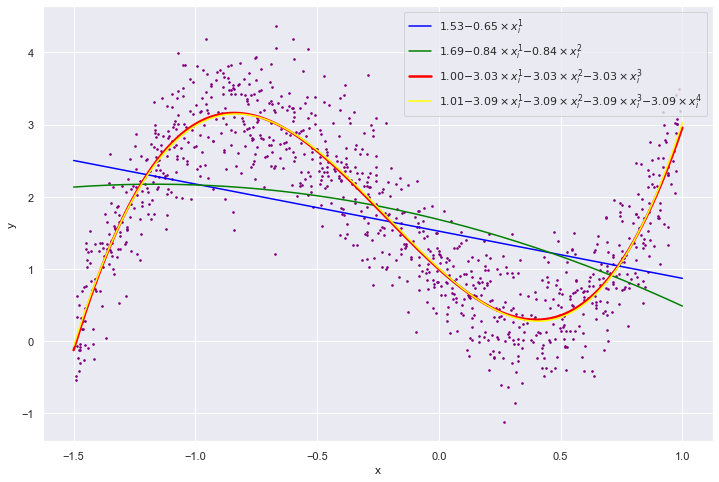

In [5]:
plt.figure(figsize=(12, 8))
points = plt.scatter(x, y, s=2.5, color='purple')
colors = {1: 'blue', 2: 'green', 3: 'red', 4: 'yellow'}
labels = {1: '', 2: '', 3: '', 4: ''}
for key in model.keys():
    # print(key)
    # print(model[key].coef_)
    labels[key] = f"${'%.2f' % model[key].coef_[0]}$"
    for i in range(1, len(model[key].coef_)):
        labels[key] += f"${'%.2f' % model[key].coef_[1] if model[key].coef_[1] < 0 else '+%.2f' % model[key].coef_[1]} \\times x_i^{i}$"


    # print(labels[key])
l1 = plt.plot(xline[1][:, 1], yline[1], color=colors[1], label=labels[1])

l2 = plt.plot(xline[2][:, 1], yline[2], color=colors[2], label=labels[2])
l3 = plt.plot(xline[3][:, 1], yline[3], color=colors[3], label=labels[3])
l4 = plt.plot(xline[4][:, 1], yline[4], color=colors[4], label=labels[4])
plt.xlabel('x')
plt.ylabel('y')
# plt.legend([l1, l2, l3, l4], [1, 2, 3, 4])
plt.legend()
plt.show()